# Data processing

In [1]:
from cc3dtools.PostProcess import PostProcess, SpacePlot
from cc3dtools.GenomeCompare import GenomeCompare

In [2]:
gc = GenomeCompare.from_gen2_file('./simulation_out/eccentric/genomes_Tue_Aug_25_14:41:02_2015.csv.gen2')
pp = PostProcess(end_file='./simulation_out/eccentric/finish_cells_Tue_Aug_25_14:41:02_2015.csv', gc=gc)

In [3]:
method_parameters = {
    "N_points": 20,
    "max_cells":500,
    "radius": 50,
    "min_cells": 20,
    "ecc_steps": 0.1,
    "cell_steps": 5,
    "lattice_size": 1000
}

In [4]:
results = pp.eccentric_sampling_strategy(**method_parameters)

[]
[]
[]
[]
[]
[]
[Cell(id=5054, x=245.76470588235293, y=749.7941176470588, z=0.0, type=1, initial=0)]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[Cell(id=5450, x=387.7027027027027, y=103.13513513513513, z=0.0, type=1, initial=0)]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[Cell(id=5054, x=245.76470588235293, y=749.7941176470588, z=0.0, type=1, initial=0)]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[Cell(id=5450, x=387.7027027027027, y=103.13513513513513, z=0.0, type=1, initial=0)]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[Cell(id=5054, x=245.76470588235293, y=749.7941176470588, z=0.0, type=1, initial=0)]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[Cell(id=5450, x=387.7027027027027, y=103.13513513513513, z=0.0, type=1, initial=0)]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[Cell(id=5054, x=245.7

/Users/zahmed/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/zahmed/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:71: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [5]:
results = results['results']

In [17]:
import pickle

In [19]:
saved = pickle.dumps(results)
saved

'(lp0\n(dp1\nS\'eccentricity\'\np2\ncnumpy.core.multiarray\nscalar\np3\n(cnumpy\ndtype\np4\n(S\'f8\'\np5\nI0\nI1\ntp6\nRp7\n(I3\nS\'<\'\np8\nNNNI-1\nI-1\nI0\ntp9\nbS\'\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\'\np10\ntp11\nRp12\nsS\'samples\'\np13\n(lp14\n(dp15\nS\'E_of_pi\'\np16\ng3\n(g7\nS\'|A\\x80\\x9b\\x10\\xc8\\xe5?\'\np17\ntp18\nRp19\nsS\'sample_size\'\np20\nI20\nsS\'S\'\np21\ng3\n(g7\nS\'3333\\xb3*\\xac@\'\np22\ntp23\nRp24\nsS\'d_0\'\np25\ng3\n(g7\nS\'\\xcb\\xe0x=+M8@\'\np26\ntp27\nRp28\nsS\'skips\'\np29\nI0\nsa(dp30\ng16\ng3\n(g7\nS\'\\xb4\\xa6k?\\x89\\x81\\xf1?\'\np31\ntp32\nRp33\nsg20\nI50\nsg21\ng3\n(g7\nS\'\\x9a\\x99\\x99\\x99\\x19\\x87\\xb2@\'\np34\ntp35\nRp36\nsg25\ng3\n(g7\nS\'\\x93\\xc28{\\xc5\\xd5>@\'\np37\ntp38\nRp39\nsg29\nI0\nsa(dp40\ng16\ng3\n(g7\nS\'\\x86\\x1f%G!\\xf3\\xf6?\'\np41\ntp42\nRp43\nsg20\nI100\nsg21\ng3\n(g7\nS\'3333s-\\xb9@\'\np44\ntp45\nRp46\nsg25\ng3\n(g7\nS\'\\xd3*\\xb2\\x1b\\xe63H@\'\np47\ntp48\nRp49\nsg29\nI0\nsa(dp50\ng16\ng3\n(g7\nS\'\\xb6\\xf2\\

In [21]:
results = pickle.loads(saved)

# Raw Results

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### MPL Log-log of E(pi) vs N

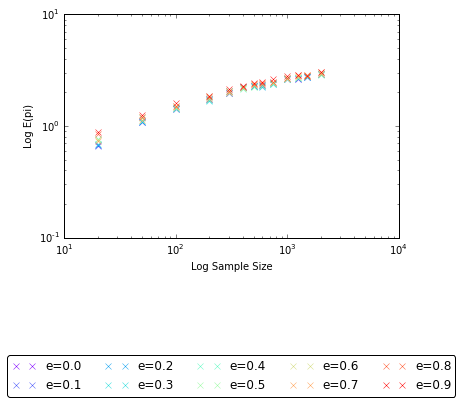

In [8]:
plt.figure()

color = plt.cm.rainbow(np.linspace(0,1,len(results)))

for i, result in enumerate(results):
    ecc = result['eccentricity']   
    x = []
    y = []
#     labels.append('e='+str(ecc))

    for sample in result['samples']:
        x.append(sample['sample_size'])
        y.append(sample['E_of_pi'])

    plt.plot(x, y, 'x', color=color[i], label='e='+str(ecc), ms=6)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), fancybox=True, ncol=5)
#         print sample['sample_size'], sample['E_of_pi']

ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')

plt.xlabel('Log Sample Size')
plt.ylabel('Log E(pi)')
plt.show()

### Log-log of E(pi) vs N

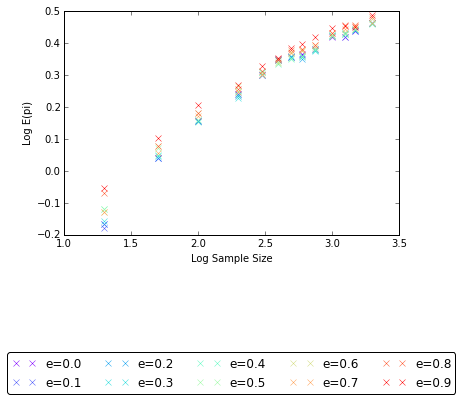

In [14]:
plt.figure()

color = plt.cm.rainbow(np.linspace(0,1,len(results)))

for i, result in enumerate(results):
    ecc = result['eccentricity']   
    x = []
    y = []
#     labels.append('e='+str(ecc))

    for sample in result['samples']:
        x.append(np.log10(sample['sample_size']))
        y.append(np.log10(sample['E_of_pi']))

    plt.plot(x, y, 'x', color=color[i], label='e='+str(ecc), ms=6)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), fancybox=True, ncol=5)
#         print sample['sample_size'], sample['E_of_pi']

ax = plt.gca()


plt.xlabel('Log Sample Size')
plt.ylabel('Log E(pi)')
plt.show()

### MPL log-log of S vs N

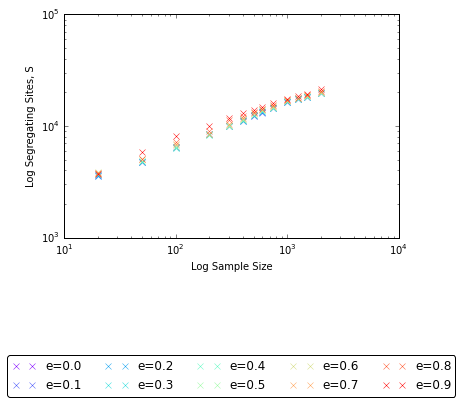

In [13]:
plt.figure()

color = plt.cm.rainbow(np.linspace(0,1,len(results)))

for i, result in enumerate(results):
    ecc = result['eccentricity']   
    x = []
    y = []
#     labels.append('e='+str(ecc))

    for sample in result['samples']:
        x.append(sample['sample_size'])
        y.append(sample['S'])

    plt.plot(x, y, 'x', color=color[i], label='e='+str(ecc), ms=6)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), fancybox=True, ncol=5)
#         print sample['sample_size'], sample['E_of_pi']

ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')

plt.xlabel('Log Sample Size')
plt.ylabel('Log Segregating Sites, S')
plt.show()

### Log-Log of S vs N

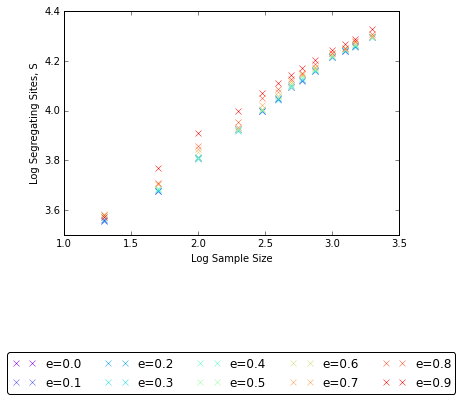

In [10]:
plt.figure()

color = plt.cm.rainbow(np.linspace(0,1,len(results)))

for i, result in enumerate(results):
    ecc = result['eccentricity']   
    x = []
    y = []
#     labels.append('e='+str(ecc))

    for sample in result['samples']:
        x.append(np.log10(sample['sample_size']))
        y.append(np.log10(sample['S']))

    plt.plot(x, y, 'x', color=color[i], label='e='+str(ecc), ms=6)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), fancybox=True, ncol=5)
#         print sample['sample_size'], sample['E_of_pi']


plt.xlabel('Log Sample Size')
plt.ylabel('Log Segregating Sites, S')
plt.show()

### E(pi) vs N

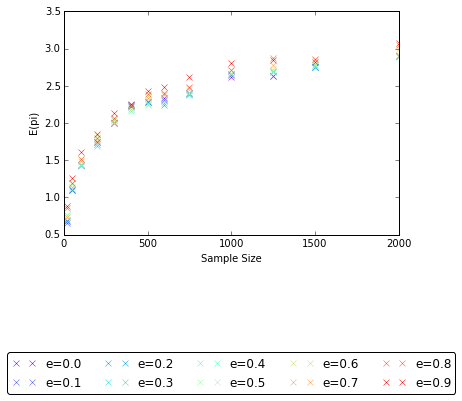

In [11]:
plt.figure()

color = plt.cm.rainbow(np.linspace(0,1,len(results)))

for i, result in enumerate(results):
    ecc = result['eccentricity']   
    x = []
    y = []
#     labels.append('e='+str(ecc))

    for sample in result['samples']:
        x.append(sample['sample_size'])
        y.append(sample['E_of_pi'])

    plt.plot(x, y, 'x', color=color[i], label='e='+str(ecc), ms=6)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), fancybox=True, ncol=5)
#         print sample['sample_size'], sample['E_of_pi']

ax = plt.gca()


plt.xlabel('Sample Size')
plt.ylabel('E(pi)')
plt.show()

### S vs N

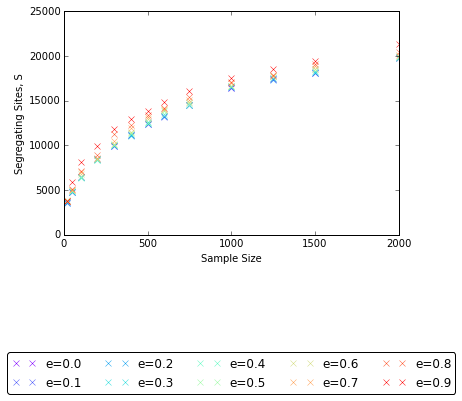

In [12]:
plt.figure()

color = plt.cm.rainbow(np.linspace(0,1,len(results)))

for i, result in enumerate(results):
    ecc = result['eccentricity']   
    x = []
    y = []
#     labels.append('e='+str(ecc))

    for sample in result['samples']:
        x.append(sample['sample_size'])
        y.append(sample['S'])

    plt.plot(x, y, 'x', color=color[i], label='e='+str(ecc), ms=6)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), fancybox=True, ncol=5)
#         print sample['sample_size'], sample['E_of_pi']


plt.xlabel('Sample Size')
plt.ylabel('Segregating Sites, S')
plt.show()

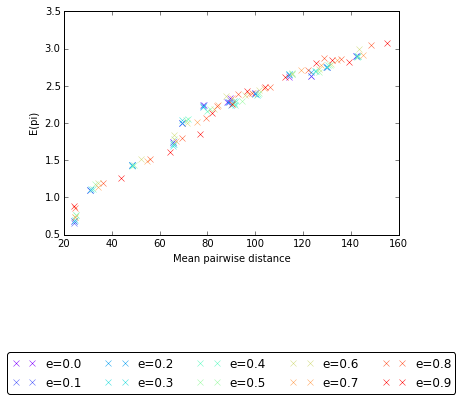

In [15]:
plt.figure()

color = plt.cm.rainbow(np.linspace(0,1,len(results)))

for i, result in enumerate(results):
    ecc = result['eccentricity']   
    x = []
    y = []
#     labels.append('e='+str(ecc))

    for sample in result['samples']:
        x.append(sample['d_0'])
        y.append(sample['E_of_pi'])

    plt.plot(x, y, 'x', color=color[i], label='e='+str(ecc), ms=6)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), fancybox=True, ncol=5)
#         print sample['sample_size'], sample['E_of_pi']

ax = plt.gca()


plt.xlabel('Mean pairwise distance')
plt.ylabel('E(pi)')
plt.show()

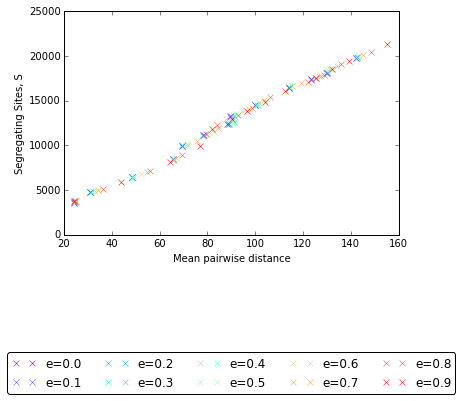

In [16]:
plt.figure()

color = plt.cm.rainbow(np.linspace(0,1,len(results)))

for i, result in enumerate(results):
    ecc = result['eccentricity']   
    x = []
    y = []
#     labels.append('e='+str(ecc))

    for sample in result['samples']:
        x.append(sample['d_0'])
        y.append(sample['S'])

    plt.plot(x, y, 'x', color=color[i], label='e='+str(ecc), ms=6)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), fancybox=True, ncol=5)
#         print sample['sample_size'], sample['E_of_pi']

ax = plt.gca()


plt.xlabel('Mean pairwise distance')
plt.ylabel('Segregating Sites, S')
plt.show()

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from cc3dtools.PostProcess import distance_between_cells, mean_distances_between_cells
from cc3dtools.Cell import Cell

In [3]:
cells = []
for i in range(1000):
    cells.append( Cell(i, *np.random.random(size=3)*1000) )
    

In [13]:
mean_distances_between_cells(cells, subsample_size=1000)

673.14031523887434

[Cell(id=329, x=598.36765537537076, y=436.65862627711147, z=46.642901274889347, type=0, initial=0),
 Cell(id=693, x=463.8500350407453, y=582.94834132023027, z=713.33502684417101, type=0, initial=0),
 Cell(id=354, x=472.30114691090586, y=325.27564376071695, z=892.95157556352422, type=0, initial=0),
 Cell(id=412, x=342.31787594628139, y=978.52682180865736, z=760.7883434717096, type=0, initial=0)]

In [27]:
np.isnan(results[0]['samples'][0]['d_0'])

True